# Import needed libraries
The best practice they say is importing all needed packages before we start building the model


In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
matplotlib.rcParams["axes.labelsize"] = 14
matplotlib.rcParams["xtick.labelsize"] = 12
matplotlib.rcParams["ytick.labelsize"] = 12
matplotlib.rcParams["text.color"] = 'k'

# Load  data and check the data.
It is a data from analytic vidhya on daily climate in Delhi in India. was used in a time series competition in analytic vidhya.

In [2]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")

In [3]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


# Data Cleaning 
Making data ready for use to build time series model

Convert the features relating to time to a datetime data type feature

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [9]:
df['date'].min(),df['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-01-01 00:00:00'))

Drop other columns not relating to time, i.e non-datetime columns

In [10]:
#cols = ['humidity','meanpressure','wind_speed']
Amount_in_hour_train =df

In [11]:
Amount_in_hour_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [12]:
Time_stuff_train = Amount_in_hour_train.sort_values('date')


In [13]:
Time_stuff_train.isnull().sum()


date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

Set the datetime feature as the index and electricity consumption as the value,from a dataframe with two columns you know?

In [14]:
Time_meantemp_train = Time_stuff_train.groupby('date')['meantemp'].sum().reset_index()

In [15]:
Time_humidity_train = Time_stuff_train.groupby('date')['humidity'].sum().reset_index()

In [16]:
Time_wind_speed_train = Time_stuff_train.groupby('date')['wind_speed'].sum().reset_index()

In [17]:
Time_meanpressure_train = Time_stuff_train.groupby('date')['meanpressure'].sum().reset_index()

In [18]:
Time_meantemp_train.set_index('date', inplace=True)
Time_humidity_train.set_index('date', inplace=True)
Time_wind_speed_train.set_index('date', inplace=True)
Time_meanpressure_train.set_index('date', inplace=True)

In [19]:
#Time_meantemp_train.index
Time_meanpressure_train.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=1462, freq=None)

Give it a start reference, and we are setting that to every month start with the MS symbol, we use the average too, that aids ploting since it summarizes it better.

In [20]:
y_temp = Time_meantemp_train['meantemp'].resample('MS').mean()
y_humidity = Time_humidity_train['humidity'].resample('MS').mean()
y_wind = Time_wind_speed_train['wind_speed'].resample('MS').mean()
y_pressure = Time_meanpressure_train['meanpressure'].resample('MS').mean()

In [21]:
y_pressure['2015']

date
2015-01-01    1018.889785
2015-02-01    1014.923469
2015-03-01    1013.950461
2015-04-01    1007.441667
2015-05-01    1002.494240
2015-06-01     999.358929
2015-07-01     998.801651
2015-08-01    1001.568212
2015-09-01    1005.351190
2015-10-01    1011.451613
2015-11-01    1014.629167
2015-12-01    1017.470622
Freq: MS, Name: meanpressure, dtype: float64

# EDA (Data Visualisation)
To check for trends relationships and patterns in the data

In [22]:
ys = [y_temp,y_humidity,y_wind,y_pressure]

Use lineplots to plot for the electricity consumption against the datetime

In [23]:
def Plot_time(y, y_label, title) :
    y.plot(figsize=(15,6))
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

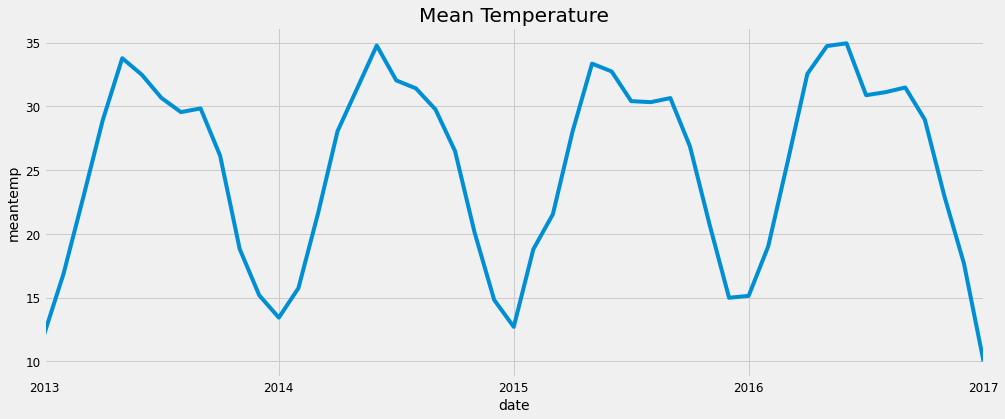

In [24]:
Plot_time(y_temp,"meantemp","Mean Temperature")

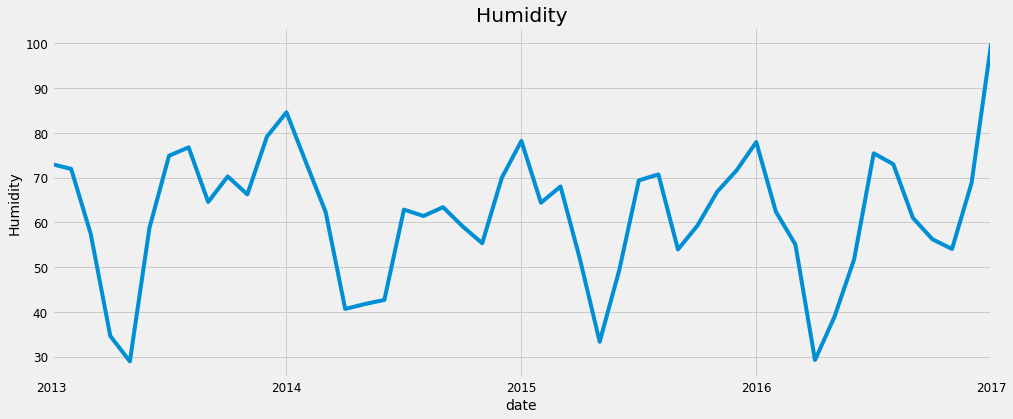

In [25]:
Plot_time(y_humidity, "Humidity", "Humidity")

Construct a decomposition plot which shows us three features of time series plots, the 1. Trend, 2. Seasonal and 3. Residue plots

In [26]:
multi = [y_temp,y_humidity,y_pressure]

In [27]:
def Plot_decomposition (y, model) :
    decomposition = sm.tsa.seasonal_decompose(y, model = model)
    fig = decomposition.plot()
    plt.show()

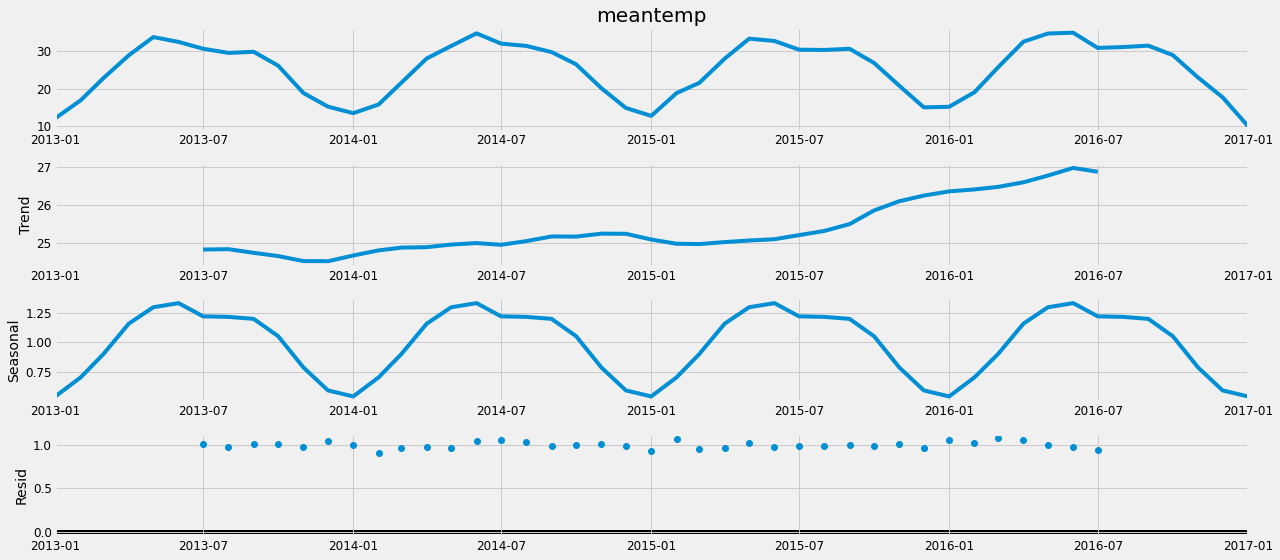

In [28]:
Plot_decomposition(y_temp, "multiplicative")

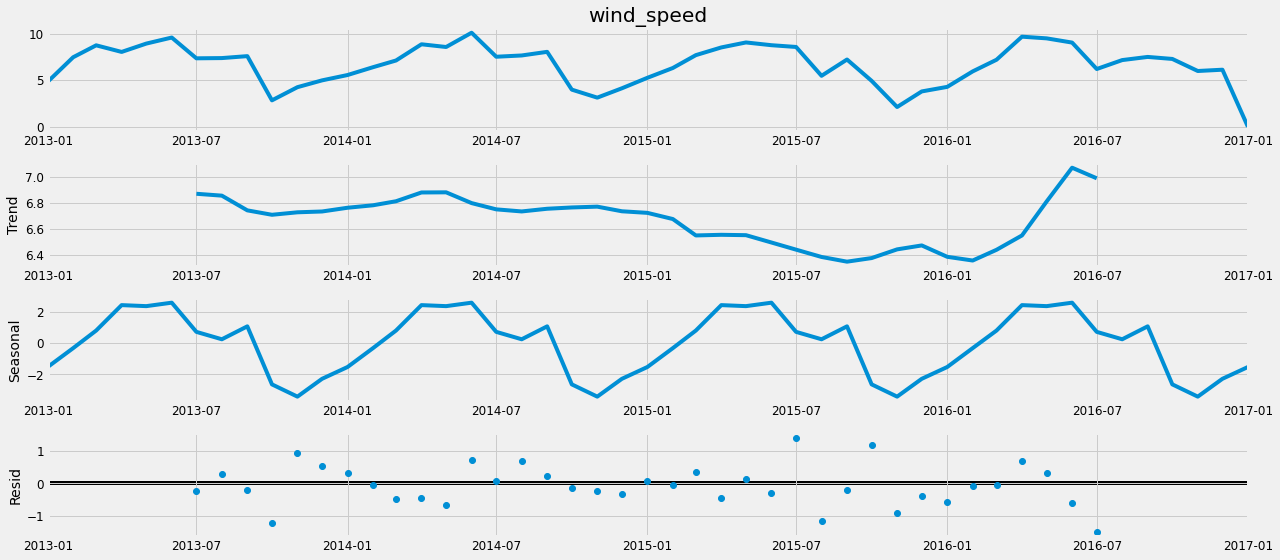

In [29]:
Plot_decomposition(y_wind, 'additive')

# Model Building

pipeline for cross-val

In [30]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0] , x[1] , x[2] , 12) for x in list(itertools.product(p,d,q))]

In [31]:
print("Example of parameter combination seasonal ARIMA")
print("SARIMAX : {} x {}".format(pdq[1], seasonal_pdq[1]))
print("SARIMAX : {} x {}".format(pdq[1], seasonal_pdq[2]))
print("SARIMAX : {} x {}".format(pdq[2], seasonal_pdq[3]))
print("SARIMAX : {} x {}".format(pdq[2], seasonal_pdq[4]))

Example of parameter combination seasonal ARIMA
SARIMAX : (0, 0, 1) x (0, 0, 1, 12)
SARIMAX : (0, 0, 1) x (0, 1, 0, 12)
SARIMAX : (0, 1, 0) x (0, 1, 1, 12)
SARIMAX : (0, 1, 0) x (1, 0, 0, 12)


In [32]:
def Search_params (y) :
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
                results = model.fit()
                print("ARIMAX {} x {} - AIC {} :".format(param,param_seasonal,results.aic))
            except:
                continue

In [33]:
def get_result (y, order, seasonal_order, enforce_invertibility) :
    mod = sm.tsa.statespace.SARIMAX(y,order=order,seasonal_order=seasonal_order,enforce_invertibility=enforce_invertibility)
    results = mod.fit()
    print(results.summary().tables[1])
    return results

In [34]:
Search_params(y_temp)

ARIMAX (0, 0, 0) x (0, 0, 0, 12) - AIC 452.4499322786039 :
ARIMAX (0, 0, 0) x (0, 0, 1, 12) - AIC 320.2477947653921 :
ARIMAX (0, 0, 0) x (0, 1, 0, 12) - AIC 152.94232714744263 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 0, 0) x (0, 1, 1, 12) - AIC 1072.8196893666272 :
ARIMAX (0, 0, 0) x (1, 0, 0, 12) - AIC 155.16965030206939 :
ARIMAX (0, 0, 0) x (1, 0, 1, 12) - AIC 145.3673541008325 :
ARIMAX (0, 0, 0) x (1, 1, 0, 12) - AIC 109.50356546113393 :
ARIMAX (0, 0, 0) x (1, 1, 1, 12) - AIC 108.25738347035663 :
ARIMAX (0, 0, 1) x (0, 0, 0, 12) - AIC 387.22255564497294 :
ARIMAX (0, 0, 1) x (0, 0, 1, 12) - AIC 271.2086844469837 :
ARIMAX (0, 0, 1) x (0, 1, 0, 12) - AIC 149.33780728923824 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 0, 1) x (0, 1, 1, 12) - AIC 1077.8450410183532 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 0, 1) x (1, 0, 0, 12) - AIC 157.46111249451596 :
ARIMAX (0, 0, 1) x (1, 0, 1, 12) - AIC 141.9730604706271 :
ARIMAX (0, 0, 1) x (1, 1, 0, 12) - AIC 102.1875883511581 :
ARIMAX (0, 0, 1) x (1, 1, 1, 12) - AIC 94.33436888911658 :
ARIMAX (0, 1, 0) x (0, 0, 0, 12) - AIC 271.30731622511803 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 1, 0) x (0, 0, 1, 12) - AIC 1319.5343426134887 :
ARIMAX (0, 1, 0) x (0, 1, 0, 12) - AIC 159.39606161406599 :
ARIMAX (0, 1, 0) x (0, 1, 1, 12) - AIC 98.30969416640782 :
ARIMAX (0, 1, 0) x (1, 0, 0, 12) - AIC 164.47439454356666 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 1, 0) x (1, 0, 1, 12) - AIC 1411.1877584665172 :
ARIMAX (0, 1, 0) x (1, 1, 0, 12) - AIC 99.6011854230864 :
ARIMAX (0, 1, 0) x (1, 1, 1, 12) - AIC 96.2794587692405 :
ARIMAX (0, 1, 1) x (0, 0, 0, 12) - AIC 243.40647144841176 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 1, 1) x (0, 0, 1, 12) - AIC 1460.4886608518918 :
ARIMAX (0, 1, 1) x (0, 1, 0, 12) - AIC 146.41734932051565 :
ARIMAX (0, 1, 1) x (0, 1, 1, 12) - AIC 94.48691591027423 :
ARIMAX (0, 1, 1) x (1, 0, 0, 12) - AIC 156.86458593968834 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 1, 1) x (1, 0, 1, 12) - AIC 1417.7146774514003 :
ARIMAX (0, 1, 1) x (1, 1, 0, 12) - AIC 101.59196875287107 :
ARIMAX (0, 1, 1) x (1, 1, 1, 12) - AIC 90.37821468039996 :
ARIMAX (1, 0, 0) x (0, 0, 0, 12) - AIC 278.96368442997493 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 0, 0) x (0, 0, 1, 12) - AIC 212.92710772065027 :
ARIMAX (1, 0, 0) x (0, 1, 0, 12) - AIC 152.53113869641865 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 0, 0) x (0, 1, 1, 12) - AIC 1199.3878613419733 :
ARIMAX (1, 0, 0) x (1, 0, 0, 12) - AIC 152.93765572610783 :
ARIMAX (1, 0, 0) x (1, 0, 1, 12) - AIC 144.45335829110883 :
ARIMAX (1, 0, 0) x (1, 1, 0, 12) - AIC 97.55416612876813 :
ARIMAX (1, 0, 0) x (1, 1, 1, 12) - AIC 98.37677213867735 :
ARIMAX (1, 0, 1) x (0, 0, 0, 12) - AIC 251.77313561999037 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 0, 1) x (0, 0, 1, 12) - AIC 193.72091526468483 :
ARIMAX (1, 0, 1) x (0, 1, 0, 12) - AIC 150.27883222131757 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 0, 1) x (0, 1, 1, 12) - AIC 1006.4895245674977 :
ARIMAX (1, 0, 1) x (1, 0, 0, 12) - AIC 154.91483128846022 :
ARIMAX (1, 0, 1) x (1, 0, 1, 12) - AIC 143.7777994128596 :
ARIMAX (1, 0, 1) x (1, 1, 0, 12) - AIC 98.81336962150985 :
ARIMAX (1, 0, 1) x (1, 1, 1, 12) - AIC 93.75080452899307 :
ARIMAX (1, 1, 0) x (0, 0, 0, 12) - AIC 241.87335631672693 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 1, 0) x (0, 0, 1, 12) - AIC 1514.3031998433808 :
ARIMAX (1, 1, 0) x (0, 1, 0, 12) - AIC 155.67978259112368 :
ARIMAX (1, 1, 0) x (0, 1, 1, 12) - AIC 99.62249561080944 :
ARIMAX (1, 1, 0) x (1, 0, 0, 12) - AIC 157.43244566939916 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 1, 0) x (1, 0, 1, 12) - AIC 1468.554360090972 :
ARIMAX (1, 1, 0) x (1, 1, 0, 12) - AIC 97.81550701695988 :
ARIMAX (1, 1, 0) x (1, 1, 1, 12) - AIC 98.05143746180971 :
ARIMAX (1, 1, 1) x (0, 0, 0, 12) - AIC 235.79518779021046 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 1, 1) x (0, 0, 1, 12) - AIC 1469.1718220657178 :
ARIMAX (1, 1, 1) x (0, 1, 0, 12) - AIC 147.8025728899538 :
ARIMAX (1, 1, 1) x (0, 1, 1, 12) - AIC 93.7677907006755 :
ARIMAX (1, 1, 1) x (1, 0, 0, 12) - AIC 155.10750106141478 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 1, 1) x (1, 0, 1, 12) - AIC 1423.9326598929702 :
ARIMAX (1, 1, 1) x (1, 1, 0, 12) - AIC 96.7772191645877 :
ARIMAX (1, 1, 1) x (1, 1, 1, 12) - AIC 92.11434427302477 :


Build Model

In [35]:
result_temp = get_result(y_temp, (0,1,1), (1,1,1,12), False)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7987      0.183     -4.354      0.000      -1.158      -0.439
ar.S.L12      -0.1923      0.641     -0.300      0.764      -1.449       1.064
ma.S.L12      -0.6595      1.458     -0.452      0.651      -3.518       2.199
sigma2         2.2702      1.859      1.221      0.222      -1.373       5.914


In [36]:
Search_params(y_humidity)

ARIMAX (0, 0, 0) x (0, 0, 0, 12) - AIC 535.9736814893142 :
ARIMAX (0, 0, 0) x (0, 0, 1, 12) - AIC 380.6041760293253 :
ARIMAX (0, 0, 0) x (0, 1, 0, 12) - AIC 267.96873932032577 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 0, 0) x (0, 1, 1, 12) - AIC 1182.8177875682663 :
ARIMAX (0, 0, 0) x (1, 0, 0, 12) - AIC 276.999046078997 :
ARIMAX (0, 0, 0) x (1, 0, 1, 12) - AIC 260.8534177563331 :
ARIMAX (0, 0, 0) x (1, 1, 0, 12) - AIC 180.05886909387164 :
ARIMAX (0, 0, 0) x (1, 1, 1, 12) - AIC 173.0846091992778 :
ARIMAX (0, 0, 1) x (0, 0, 0, 12) - AIC 474.6033531607602 :
ARIMAX (0, 0, 1) x (0, 0, 1, 12) - AIC 339.0013781369972 :
ARIMAX (0, 0, 1) x (0, 1, 0, 12) - AIC 261.0463095370775 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 0, 1) x (0, 1, 1, 12) - AIC 1004.1869365057898 :
ARIMAX (0, 0, 1) x (1, 0, 0, 12) - AIC 276.71990108491747 :
ARIMAX (0, 0, 1) x (1, 0, 1, 12) - AIC 253.69865757199494 :
ARIMAX (0, 0, 1) x (1, 1, 0, 12) - AIC 177.48934571258064 :
ARIMAX (0, 0, 1) x (1, 1, 1, 12) - AIC 170.94257324259334 :
ARIMAX (0, 1, 0) x (0, 0, 0, 12) - AIC 381.28907757300004 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 1, 0) x (0, 0, 1, 12) - AIC 1051.8037462629427 :
ARIMAX (0, 1, 0) x (0, 1, 0, 12) - AIC 273.09758342809585 :
ARIMAX (0, 1, 0) x (0, 1, 1, 12) - AIC 172.41827448230808 :
ARIMAX (0, 1, 0) x (1, 0, 0, 12) - AIC 276.9017913861849 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 1, 0) x (1, 0, 1, 12) - AIC 1401.110872413158 :
ARIMAX (0, 1, 0) x (1, 1, 0, 12) - AIC 177.3723370195644 :
ARIMAX (0, 1, 0) x (1, 1, 1, 12) - AIC 171.30053041257466 :
ARIMAX (0, 1, 1) x (0, 0, 0, 12) - AIC 371.03221476271676 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 1, 1) x (0, 0, 1, 12) - AIC 1343.3860885900501 :
ARIMAX (0, 1, 1) x (0, 1, 0, 12) - AIC 260.19263697778194 :
ARIMAX (0, 1, 1) x (0, 1, 1, 12) - AIC 161.3067125871055 :
ARIMAX (0, 1, 1) x (1, 0, 0, 12) - AIC 273.71205218650084 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 1, 1) x (1, 0, 1, 12) - AIC 1412.109833513195 :
ARIMAX (0, 1, 1) x (1, 1, 0, 12) - AIC 179.36425473191468 :
ARIMAX (0, 1, 1) x (1, 1, 1, 12) - AIC 163.68479038459327 :
ARIMAX (1, 0, 0) x (0, 0, 0, 12) - AIC 390.2295542001829 :
ARIMAX (1, 0, 0) x (0, 0, 1, 12) - AIC 289.7692476536244 :
ARIMAX (1, 0, 0) x (0, 1, 0, 12) - AIC 267.6206096035454 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 0, 0) x (0, 1, 1, 12) - AIC 1133.8267152988676 :
ARIMAX (1, 0, 0) x (1, 0, 0, 12) - AIC 268.64795939057603 :
ARIMAX (1, 0, 0) x (1, 0, 1, 12) - AIC 260.5022901456514 :
ARIMAX (1, 0, 0) x (1, 1, 0, 12) - AIC 173.55049592765414 :
ARIMAX (1, 0, 0) x (1, 1, 1, 12) - AIC 175.50426511272786 :
ARIMAX (1, 0, 1) x (0, 0, 0, 12) - AIC 380.9532754354213 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 0, 1) x (0, 0, 1, 12) - AIC 290.5131862730472 :
ARIMAX (1, 0, 1) x (0, 1, 0, 12) - AIC 263.0121974641905 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 0, 1) x (0, 1, 1, 12) - AIC 967.0203619661371 :
ARIMAX (1, 0, 1) x (1, 0, 0, 12) - AIC 272.26271281195767 :
ARIMAX (1, 0, 1) x (1, 0, 1, 12) - AIC 255.57718104218984 :
ARIMAX (1, 0, 1) x (1, 1, 0, 12) - AIC 173.30129727326587 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 0, 1) x (1, 1, 1, 12) - AIC 225.42296075337217 :
ARIMAX (1, 1, 0) x (0, 0, 0, 12) - AIC 380.3697694698757 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 1, 0) x (0, 0, 1, 12) - AIC 1323.0577424391254 :
ARIMAX (1, 1, 0) x (0, 1, 0, 12) - AIC 272.5508775519662 :
ARIMAX (1, 1, 0) x (0, 1, 1, 12) - AIC 173.51738238338157 :
ARIMAX (1, 1, 0) x (1, 0, 0, 12) - AIC 270.36490245479916 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 1, 0) x (1, 0, 1, 12) - AIC 1381.3341439988335 :
ARIMAX (1, 1, 0) x (1, 1, 0, 12) - AIC 171.82705075149119 :
ARIMAX (1, 1, 0) x (1, 1, 1, 12) - AIC 173.22270058398027 :
ARIMAX (1, 1, 1) x (0, 0, 0, 12) - AIC 373.02692233305453 :
ARIMAX (1, 1, 1) x (0, 0, 1, 12) - AIC 1373.4812265004116 :
ARIMAX (1, 1, 1) x (0, 1, 0, 12) - AIC 259.77892454967935 :
ARIMAX (1, 1, 1) x (0, 1, 1, 12) - AIC 161.9476376773102 :
ARIMAX (1, 1, 1) x (1, 0, 0, 12) - AIC 264.7171979233818 :
ARIMAX (1, 1, 1) x (1, 0, 1, 12) - AIC 1409.533797026564 :
ARIMAX (1, 1, 1) x (1, 1, 0, 12) - AIC 170.49375294737405 :
ARIMAX (1, 1, 1) x (1, 1, 1, 12) - AIC 162.43514668272238 :


In [37]:
result_humidity = get_result(y_humidity, (0,1,1), (0,1,1,12), False)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6567      0.172     -3.819      0.000      -0.994      -0.320
ma.S.L12      -0.9401      2.758     -0.341      0.733      -6.345       4.465
sigma2        55.4102    139.939      0.396      0.692    -218.866     329.686


In [38]:
Search_params(y_wind)

ARIMAX (0, 0, 0) x (0, 0, 0, 12) - AIC 325.7845583806 :
ARIMAX (0, 0, 0) x (0, 0, 1, 12) - AIC 225.90816060478994 :
ARIMAX (0, 0, 0) x (0, 1, 0, 12) - AIC 130.9042609907027 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 0, 0) x (0, 1, 1, 12) - AIC 1126.235448704331 :
ARIMAX (0, 0, 0) x (1, 0, 0, 12) - AIC 135.48503384050676 :
ARIMAX (0, 0, 0) x (1, 0, 1, 12) - AIC 134.14988648977672 :
ARIMAX (0, 0, 0) x (1, 1, 0, 12) - AIC 99.04753332807938 :
ARIMAX (0, 0, 0) x (1, 1, 1, 12) - AIC 98.15638706715428 :
ARIMAX (0, 0, 1) x (0, 0, 0, 12) - AIC 269.161629836429 :
ARIMAX (0, 0, 1) x (0, 0, 1, 12) - AIC 192.88140951480193 :
ARIMAX (0, 0, 1) x (0, 1, 0, 12) - AIC 129.73792253614627 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 0, 1) x (0, 1, 1, 12) - AIC 1112.2877308045292 :
ARIMAX (0, 0, 1) x (1, 0, 0, 12) - AIC 137.45201833883542 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 0, 1) x (1, 0, 1, 12) - AIC 133.87961817677825 :
ARIMAX (0, 0, 1) x (1, 1, 0, 12) - AIC 100.98670947555438 :
ARIMAX (0, 0, 1) x (1, 1, 1, 12) - AIC 97.18585390631111 :
ARIMAX (0, 1, 0) x (0, 0, 0, 12) - AIC 192.77081909896083 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 1, 0) x (0, 0, 1, 12) - AIC 1168.595340962296 :
ARIMAX (0, 1, 0) x (0, 1, 0, 12) - AIC 146.731919267943 :
ARIMAX (0, 1, 0) x (0, 1, 1, 12) - AIC 104.05125629429085 :
ARIMAX (0, 1, 0) x (1, 0, 0, 12) - AIC 143.48776778962917 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 1, 0) x (1, 0, 1, 12) - AIC 1221.4267350218404 :
ARIMAX (0, 1, 0) x (1, 1, 0, 12) - AIC 107.50701701518001 :
ARIMAX (0, 1, 0) x (1, 1, 1, 12) - AIC 105.81281927284793 :
ARIMAX (0, 1, 1) x (0, 0, 0, 12) - AIC 191.0942879122311 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 1, 1) x (0, 0, 1, 12) - AIC 1323.7332232478686 :
ARIMAX (0, 1, 1) x (0, 1, 0, 12) - AIC 129.04917840323708 :
ARIMAX (0, 1, 1) x (0, 1, 1, 12) - AIC 93.65910846900874 :
ARIMAX (0, 1, 1) x (1, 0, 0, 12) - AIC 136.46680799098664 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 1, 1) x (1, 0, 1, 12) - AIC 1324.1809184231274 :
ARIMAX (0, 1, 1) x (1, 1, 0, 12) - AIC 101.4318415978392 :
ARIMAX (0, 1, 1) x (1, 1, 1, 12) - AIC 96.51514830911593 :
ARIMAX (1, 0, 0) x (0, 0, 0, 12) - AIC 198.78577068373238 :
ARIMAX (1, 0, 0) x (0, 0, 1, 12) - AIC 150.2977030882108 :
ARIMAX (1, 0, 0) x (0, 1, 0, 12) - AIC 132.89449494535094 :
ARIMAX (1, 0, 0) x (0, 1, 1, 12) - AIC 1191.053670798763 :
ARIMAX (1, 0, 0) x (1, 0, 0, 12) - AIC 134.569592170768 :
ARIMAX (1, 0, 0) x (1, 0, 1, 12) - AIC 136.08786445369122 :
ARIMAX (1, 0, 0) x (1, 1, 0, 12) - AIC 98.18002061452627 :
ARIMAX (1, 0, 0) x (1, 1, 1, 12) - AIC 100.11124509252532 :
ARIMAX (1, 0, 1) x (0, 0, 0, 12) - AIC 195.24100228793023 :
ARIMAX (1, 0, 1) x (0, 0, 1, 12) - AIC 148.9145711713174 :
ARIMAX (1, 0, 1) x (0, 1, 0, 12) - AIC 131.21486428445877 :
ARIMAX (1, 0, 1) x (0, 1, 1, 12) - AIC 1144.5497682102207 :
ARIMAX (1, 0, 1) x (1, 0, 0, 12) - AIC 136.48721322338545 :
ARIMAX (1, 0, 1) x (1, 0, 1, 12) - AIC 134.92228

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 1, 0) x (0, 0, 1, 12) - AIC 1266.707595975823 :
ARIMAX (1, 1, 0) x (0, 1, 0, 12) - AIC 143.8095772598966 :
ARIMAX (1, 1, 0) x (0, 1, 1, 12) - AIC 104.3194260933031 :
ARIMAX (1, 1, 0) x (1, 0, 0, 12) - AIC 140.5197550410584 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 1, 0) x (1, 0, 1, 12) - AIC 1267.0925529103386 :
ARIMAX (1, 1, 0) x (1, 1, 0, 12) - AIC 104.43612803758283 :
ARIMAX (1, 1, 0) x (1, 1, 1, 12) - AIC 106.27428221392194 :
ARIMAX (1, 1, 1) x (0, 0, 0, 12) - AIC 193.0660986919866 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 1, 1) x (0, 0, 1, 12) - AIC 1340.9683513469797 :
ARIMAX (1, 1, 1) x (0, 1, 0, 12) - AIC 131.01766705369005 :
ARIMAX (1, 1, 1) x (0, 1, 1, 12) - AIC 95.62064385896245 :
ARIMAX (1, 1, 1) x (1, 0, 0, 12) - AIC 135.714828309194 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 1, 1) x (1, 0, 1, 12) - AIC 1341.404685562901 :
ARIMAX (1, 1, 1) x (1, 1, 0, 12) - AIC 99.74019249453328 :
ARIMAX (1, 1, 1) x (1, 1, 1, 12) - AIC 98.42570960729628 :


In [39]:
result_wind = get_result(y_wind, (0,1,1), (0,1,1,12), False)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   1032.510     -0.001      0.999   -2024.683    2022.683
ma.S.L12      -0.1285      0.309     -0.416      0.677      -0.733       0.476
sigma2         2.0791   2146.612      0.001      0.999   -4205.203    4209.361


In [40]:
Search_params(y_pressure)

ARIMAX (0, 0, 0) x (0, 0, 0, 12) - AIC 802.4701728911373 :
ARIMAX (0, 0, 0) x (0, 0, 1, 12) - AIC 572.8043587644732 :
ARIMAX (0, 0, 0) x (0, 1, 0, 12) - AIC 365.099645408438 :
ARIMAX (0, 0, 0) x (0, 1, 1, 12) - AIC 880.84725329499 :
ARIMAX (0, 0, 0) x (1, 0, 0, 12) - AIC 375.78124011583105 :
ARIMAX (0, 0, 0) x (1, 0, 1, 12) - AIC 368.71251809449797 :
ARIMAX (0, 0, 0) x (1, 1, 0, 12) - AIC 265.2043536999285 :
ARIMAX (0, 0, 0) x (1, 1, 1, 12) - AIC 257.729459849444 :
ARIMAX (0, 0, 1) x (0, 0, 0, 12) - AIC 729.1969231907435 :
ARIMAX (0, 0, 1) x (0, 0, 1, 12) - AIC 519.1878905847303 :
ARIMAX (0, 0, 1) x (0, 1, 0, 12) - AIC 357.990682128905 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 0, 1) x (0, 1, 1, 12) - AIC 886.6274716710645 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 0, 1) x (1, 0, 0, 12) - AIC 377.78211683761424 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 0, 1) x (1, 0, 1, 12) - AIC 363.03678094217486 :
ARIMAX (0, 0, 1) x (1, 1, 0, 12) - AIC 267.20293400337505 :
ARIMAX (0, 0, 1) x (1, 1, 1, 12) - AIC 250.2141243313831 :
ARIMAX (0, 1, 0) x (0, 0, 0, 12) - AIC 498.1432596653332 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 1, 0) x (0, 0, 1, 12) - AIC 1200.9957297299907 :
ARIMAX (0, 1, 0) x (0, 1, 0, 12) - AIC 380.754917004843 :
ARIMAX (0, 1, 0) x (0, 1, 1, 12) - AIC 262.5287986905564 :
ARIMAX (0, 1, 0) x (1, 0, 0, 12) - AIC 391.7438170253106 :
ARIMAX (0, 1, 0) x (1, 0, 1, 12) - AIC 1503.757617427973 :
ARIMAX (0, 1, 0) x (1, 1, 0, 12) - AIC 272.39410982065215 :
ARIMAX (0, 1, 0) x (1, 1, 1, 12) - AIC 264.0935145069289 :
ARIMAX (0, 1, 1) x (0, 0, 0, 12) - AIC 464.1597809725809 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 1, 1) x (0, 0, 1, 12) - AIC 1476.3989753048156 :
ARIMAX (0, 1, 1) x (0, 1, 0, 12) - AIC 351.0203135264447 :
ARIMAX (0, 1, 1) x (0, 1, 1, 12) - AIC 239.2920470034726 :
ARIMAX (0, 1, 1) x (1, 0, 0, 12) - AIC 371.6270635057452 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (0, 1, 1) x (1, 0, 1, 12) - AIC 1208.129757147097 :
ARIMAX (0, 1, 1) x (1, 1, 0, 12) - AIC 258.5766714701134 :
ARIMAX (0, 1, 1) x (1, 1, 1, 12) - AIC 241.28781858492653 :
ARIMAX (1, 0, 0) x (0, 0, 0, 12) - AIC 509.66287595374683 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 0, 0) x (0, 0, 1, 12) - AIC 395.64880668428697 :
ARIMAX (1, 0, 0) x (0, 1, 0, 12) - AIC 367.0922679409709 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 0, 0) x (0, 1, 1, 12) - AIC 717.7848084136224 :
ARIMAX (1, 0, 0) x (1, 0, 0, 12) - AIC 368.69075009027756 :
ARIMAX (1, 0, 0) x (1, 0, 1, 12) - AIC 370.68912299125225 :
ARIMAX (1, 0, 0) x (1, 1, 0, 12) - AIC 257.733295190082 :
ARIMAX (1, 0, 0) x (1, 1, 1, 12) - AIC 259.72835006118214 :
ARIMAX (1, 0, 1) x (0, 0, 0, 12) - AIC 477.39515127622 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 0, 1) x (0, 0, 1, 12) - AIC 388.6836367845455 :
ARIMAX (1, 0, 1) x (0, 1, 0, 12) - AIC 359.9704145119966 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 0, 1) x (0, 1, 1, 12) - AIC 827.2593478483577 :
ARIMAX (1, 0, 1) x (1, 0, 0, 12) - AIC 369.77776857017415 :
ARIMAX (1, 0, 1) x (1, 0, 1, 12) - AIC 363.5207638945634 :
ARIMAX (1, 0, 1) x (1, 1, 0, 12) - AIC 259.700327821443 :
ARIMAX (1, 0, 1) x (1, 1, 1, 12) - AIC 252.1832074516754 :
ARIMAX (1, 1, 0) x (0, 0, 0, 12) - AIC 487.3082938152559 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 1, 0) x (0, 0, 1, 12) - AIC 1318.4243710089704 :
ARIMAX (1, 1, 0) x (0, 1, 0, 12) - AIC 372.59442634101526 :
ARIMAX (1, 1, 0) x (0, 1, 1, 12) - AIC 257.8402217593741 :
ARIMAX (1, 1, 0) x (1, 0, 0, 12) - AIC 374.0837573709927 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 1, 0) x (1, 0, 1, 12) - AIC 1439.1954979181244 :
ARIMAX (1, 1, 0) x (1, 1, 0, 12) - AIC 257.2221657132221 :
ARIMAX (1, 1, 0) x (1, 1, 1, 12) - AIC 259.21766150372116 :
ARIMAX (1, 1, 1) x (0, 0, 0, 12) - AIC 466.05014927757225 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 1, 1) x (0, 0, 1, 12) - AIC 816.9177015622712 :
ARIMAX (1, 1, 1) x (0, 1, 0, 12) - AIC 353.01124763382506 :
ARIMAX (1, 1, 1) x (0, 1, 1, 12) - AIC 241.28060479862302 :
ARIMAX (1, 1, 1) x (1, 0, 0, 12) - AIC 363.82556604001326 :


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX (1, 1, 1) x (1, 0, 1, 12) - AIC 1435.4784439517034 :
ARIMAX (1, 1, 1) x (1, 1, 0, 12) - AIC 250.9683571446822 :
ARIMAX (1, 1, 1) x (1, 1, 1, 12) - AIC 243.27616302980772 :


In [41]:
result_pressure = get_result(y_pressure, (1,1,1), (0,1,1,12), False)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0023      0.590      0.004      0.997      -1.155       1.159
ma.L1         -1.0000      0.105     -9.531      0.000      -1.206      -0.794
ma.S.L12       0.0483      3.182      0.015      0.988      -6.189       6.285
sigma2      1391.6601   7.86e-05   1.77e+07      0.000    1391.660    1391.660


Plot to diagnose model

In [42]:
def Plot_diagonistics(results) :
    results.plot_diagnostics(figsize=(16,8))
    plt.show()
    

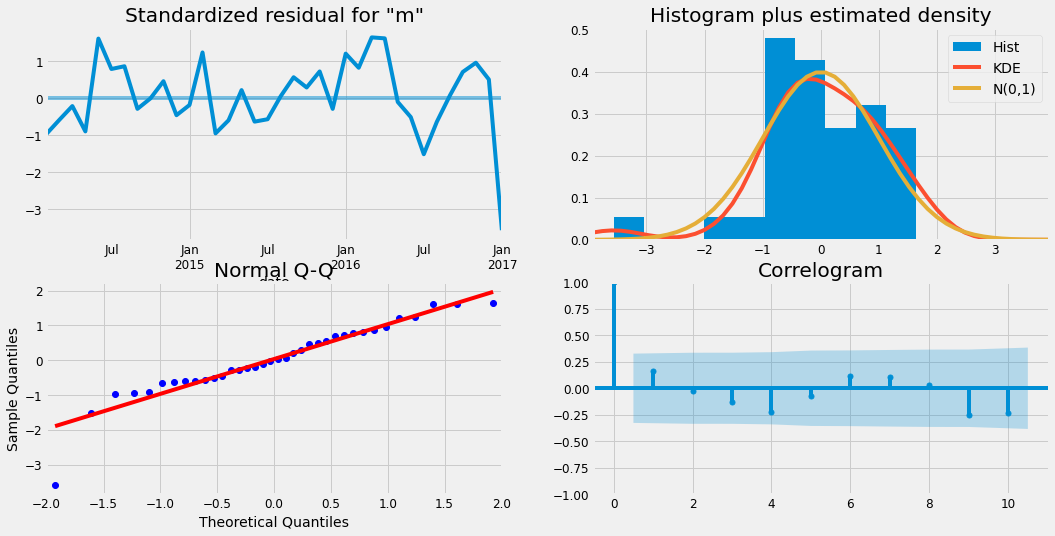

In [43]:
Plot_diagonistics(result_temp)

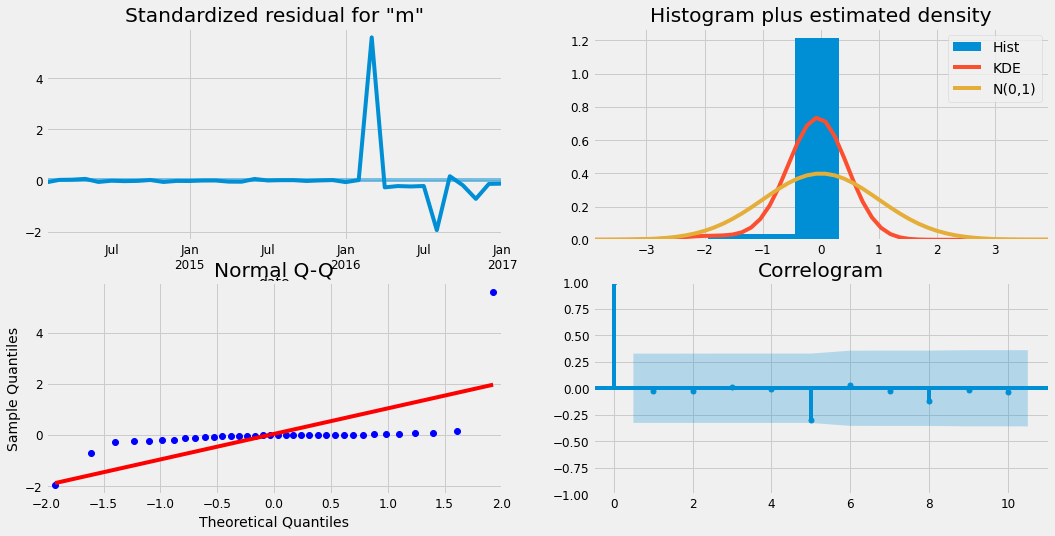

In [44]:
Plot_diagonistics(result_pressure)

# Model Evaluation
plotting predicted weather feature with the observed weather feature

In [45]:
def Plot_pred (result, y, date, year_plot, y_label, title) :
    pred = result.get_prediction(start= pd.to_datetime(date),dynamic= False)
    pred_ci = pred.conf_int()

    ax = y[year_plot:].plot(label= 'observed')
    pred.predicted_mean.plot(ax=ax,label='one step ahead forecast',alpha=.7,figsize=(14,7))

    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:,0],
                    pred_ci.iloc[:,1],color='k',alpha=.2)

    ax.set_xlabel("Date")
    ax.set_ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()
    return pred
    

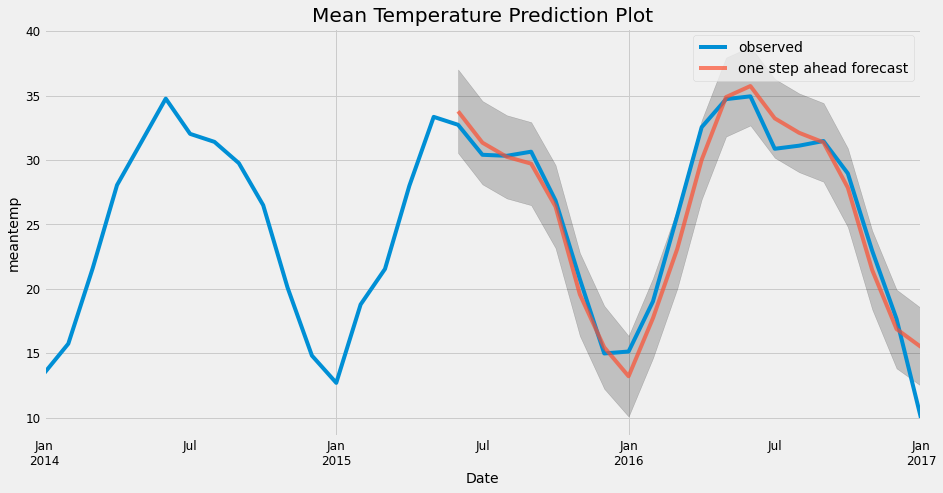

In [46]:
pred_temp = Plot_pred(result_temp, y_temp, '2015-06-01', '2014', 'meantemp', "Mean Temperature Prediction Plot")

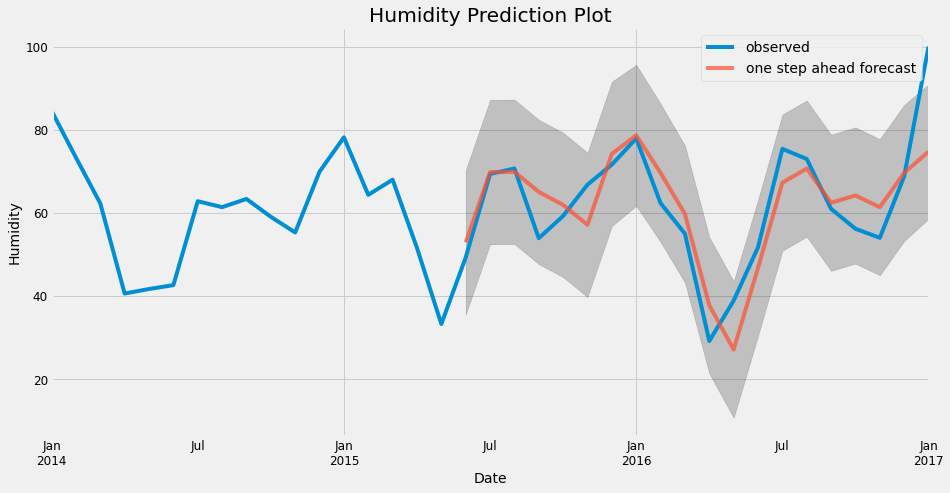

In [47]:
pred_humidity = Plot_pred(result_humidity, y_humidity, '2015-06-01', '2014', 'Humidity', "Humidity Prediction Plot")

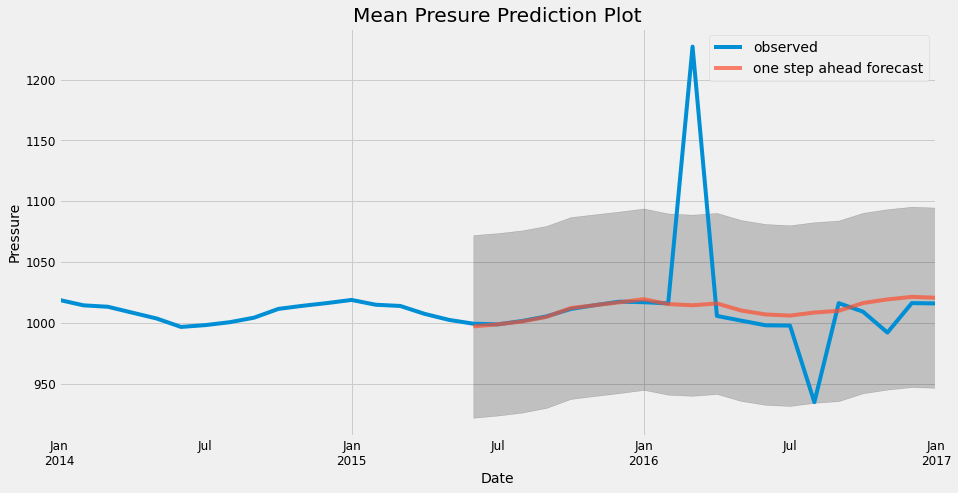

In [48]:
pred_pressure = Plot_pred(result_pressure, y_pressure, '2015-06-01', '2014', 'Pressure', "Mean Presure Prediction Plot")

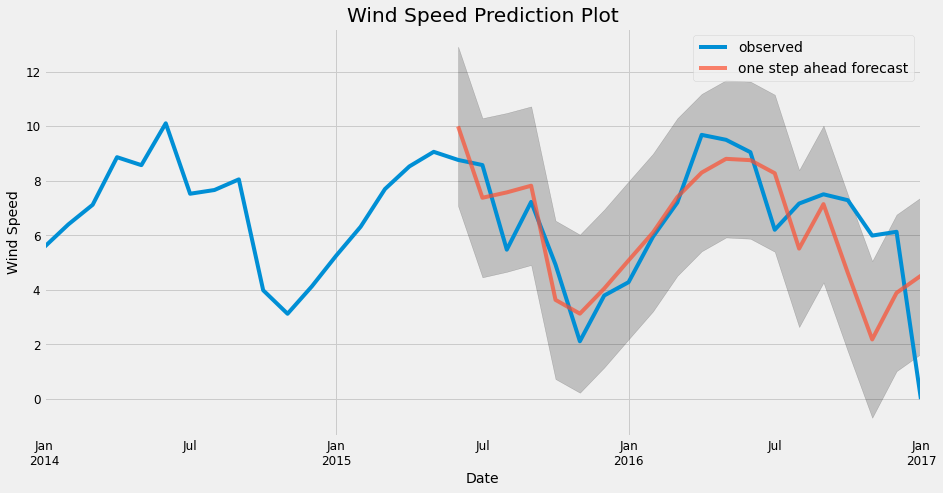

In [49]:
pred_wind = Plot_pred(result_wind, y_wind,'2015/06/01', '2014', 'Wind Speed', 'Wind Speed Prediction Plot')

Evaluating model using MSE and RMSE

In [50]:
def Display_RMSE (pred, y, date) :
    y_forecasted = pred.predicted_mean
    y_true = y[date:]
    rmse = ((y_forecasted - y_true)**2).mean()
    print("The root mean squared error forecast is {} ".format(round(np.sqrt(rmse),2)))
    return rmse

In [51]:
rmse_temp = Display_RMSE(pred_temp, y_temp, '2016-01-01')

The root mean squared error forecast is 2.15 


In [52]:
rmse_humidity = Display_RMSE(pred_humidity, y_humidity, '2016-01-01')

The root mean squared error forecast is 9.37 


In [53]:
rmse_wind = Display_RMSE(pred_wind, y_wind, '2016-01-01')

The root mean squared error forecast is 2.1 


In [54]:
rmse_pressure = Display_RMSE(pred_pressure, y_pressure, '2016-01-01')

The root mean squared error forecast is 63.16 


# Forecasting

Using the model to forecast for future weather features and plotting it for graphical representation

In [55]:
def Forecast(results, y, steps = 100, figsize = (14, 7), xlabel = 'Date', ylabel = "Dependent", title = "Plot"):
    pred_uc = results.get_forecast(steps= steps)
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label= 'observed',figsize=figsize)
    pred_uc.predicted_mean.plot(ax=ax,label= 'forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:,0],
                    pred_ci.iloc[:,1], color= 'k', alpha=.25)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

In [56]:
pred_disp = result_temp.get_forecast(steps = 40)
mean_disp = pred_disp.predicted_mean
mean_disp.columns = ["Date", "Prediction"]
mean_disp.head(12)

2017-02-01    18.721168
2017-03-01    23.670039
2017-04-01    30.129854
2017-05-01    34.250277
2017-06-01    34.722823
2017-07-01    32.053489
2017-08-01    31.688436
2017-09-01    31.485775
2017-10-01    28.094895
2017-11-01    21.693933
2017-12-01    16.565561
2018-01-01    14.256522
Freq: MS, Name: predicted_mean, dtype: float64

In [57]:
type(mean_disp)

pandas.core.series.Series

In [58]:
mean_disp.reset_index()

,index,predicted_mean
0,2017-02-01,18.721168
1,2017-03-01,23.670039
2,2017-04-01,30.129854
3,2017-05-01,34.250277
4,2017-06-01,34.722823
5,2017-07-01,32.053489
6,2017-08-01,31.688436
7,2017-09-01,31.485775
8,2017-10-01,28.094895
9,2017-11-01,21.693933


In [59]:
mean_disp.to_frame()

,predicted_mean
2017-02-01,18.721168
2017-03-01,23.670039
2017-04-01,30.129854
2017-05-01,34.250277
2017-06-01,34.722823
2017-07-01,32.053489
2017-08-01,31.688436
2017-09-01,31.485775
2017-10-01,28.094895
2017-11-01,21.693933


In [60]:
mean_df = mean_disp.to_frame()

In [63]:
def forecast(results, steps = 100, figsize = (14, 7), xlabel = 'Date', ylabel = "Dependent", title = "Plot"):
    pred_uc = results.get_forecast(steps= steps)
    pred_ci = pred_uc.conf_int()

    #ax = y.plot(label= 'observed',figsize=figsize)
    ax = pred_uc.predicted_mean.plot(label= 'forecast',figsize=figsize)
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:,0],
                    pred_ci.iloc[:,1], color= 'k', alpha=.25)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

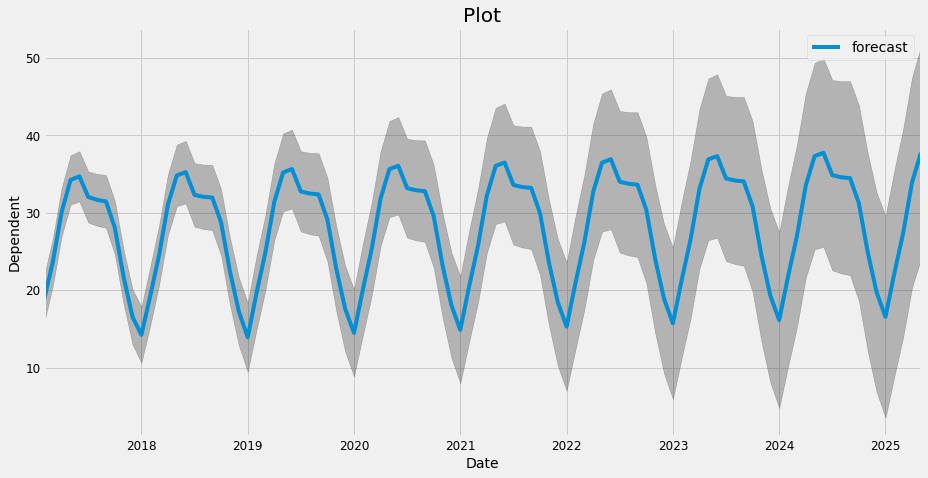

In [64]:
forecast(result_temp)

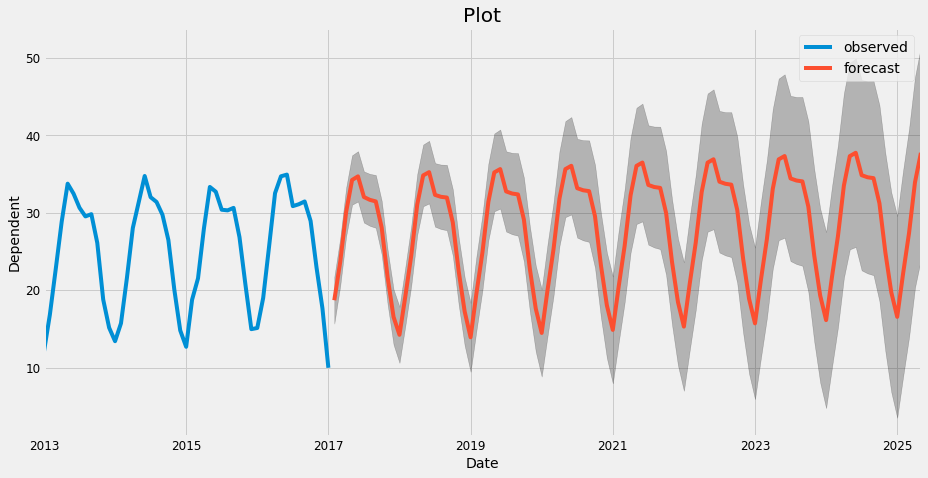

In [65]:
Forecast(result_temp,y_temp)

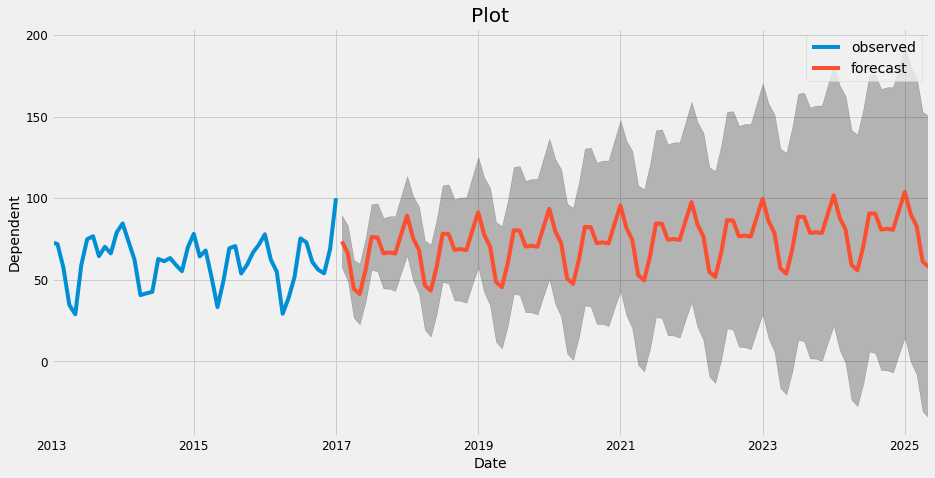

In [66]:
Forecast(result_humidity, y_humidity)

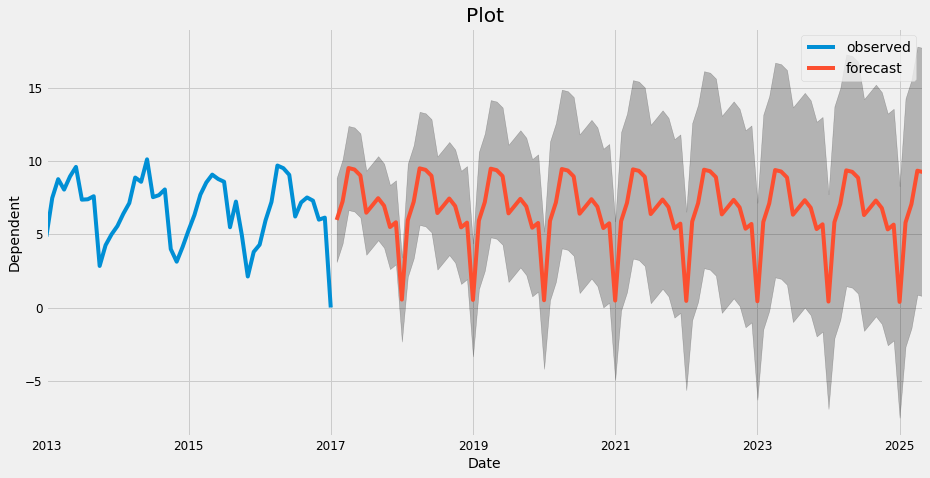

In [67]:
Forecast(result_wind, y_wind)

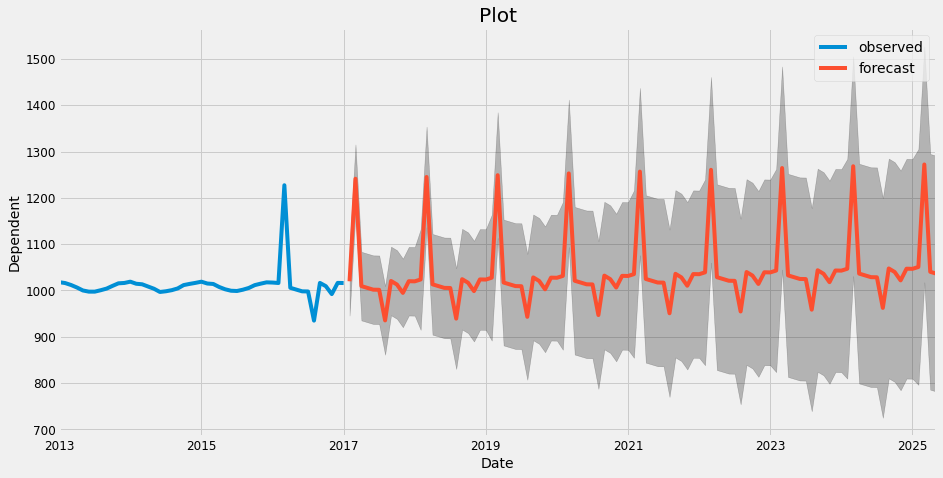

In [68]:
Forecast(result_pressure, y_pressure)

In [69]:
def pickle_model(model, file_name) :
    sm.iolib.smpickle.save_pickle(model, file_name)
    return file_name

In [70]:
pickle_model(result_temp, "model_temp")

'model_temp'

In [71]:
pickle_model(result_humidity, "model_humidity")

'model_humidity'

In [72]:
pickle_model(result_wind, "model_wind")

'model_wind'

In [73]:
pickle_model(result_pressure, 'model_pressure')

'model_pressure'